In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook
from sklearn.linear_model import LinearRegression




In [ ]:
h=1
sd=1
n=1000
def gen_data(n,h,sd1,sd2):
  x1=ss.norm.rvs(-h, sd1, n)
  y1=ss.norm.rvs(0, sd1, n)
  x2=ss.norm.rvs(h, sd2, n)
  y2=ss.norm.rvs(0, sd2, n)
  return (x1, y1, x2, y2)

clf=LogisticRegression()
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)
X=np.vstack((np.vstack((x1, y1)).T,np.vstack((x2, y2)).T))
X.shape
y=np.hstack((np.repeat(1,n),np.repeat(2,n)))
y.shape
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.5, random_state=1)
X_train.shape
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
clf.predict_proba(np.array([-2,0]).reshape(1, -1))

array([[0.96938807, 0.03061193]])

In [ ]:
clf.predict(np.array([-2,0]).reshape(1, -1))

array([2])

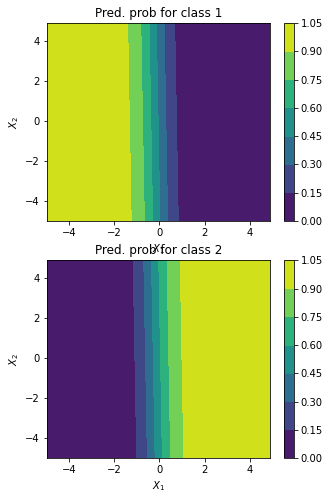

In [ ]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1)) #creo la malla 
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1)) # los convierto en vector 
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");